In [1]:
# Import necesary libraries
import yfinance as yf
import numpy as np


# Download historical data for required stocks
tickers = ["AMZN","GOOG","MSFT"]
ohlcv_data = {}


# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
   temp = yf.download(ticker,period='1mo',interval='5m')
   temp.dropna(how="any",inplace=True)
   ohlcv_data[ticker] = temp
  
def RSI(DF, n=14):
   "function to calculate RSI"
   df = DF.copy()
   df["change"] = df["Adj Close"] - df["Adj Close"].shift(1)
   df["gain"] = np.where(df["change"]>=0, df["change"], 0)
   df["loss"] = np.where(df["change"]<0, -1*df["change"], 0)
   df["avgGain"] = df["gain"].ewm(alpha=1/n, min_periods=n).mean()
   df["avgLoss"] = df["loss"].ewm(alpha=1/n, min_periods=n).mean()
   df["rs"] = df["avgGain"]/df["avgLoss"]
   df["rsi"] = 100 - (100/ (1 + df["rs"]))
   return df["rsi"]




for ticker in ohlcv_data:
   ohlcv_data[ticker]["RSI"] = RSI(ohlcv_data[ticker])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
ohlcv_data['MSFT']

,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2023-05-15 09:30:00-04:00,309.095001,309.279999,307.700012,307.730011,307.730011,1215656,NaN
2023-05-15 09:35:00-04:00,307.748505,308.980011,307.640015,307.975006,307.975006,425198,NaN
2023-05-15 09:40:00-04:00,307.980194,309.269989,307.869995,308.949402,308.949402,460425,NaN
2023-05-15 09:45:00-04:00,308.950012,309.499512,308.679993,308.769989,308.769989,332245,NaN
2023-05-15 09:50:00-04:00,308.750000,308.850006,308.130005,308.570007,308.570007,254799,NaN
...,...,...,...,...,...,...,...
2023-06-12 15:35:00-04:00,330.940002,331.429993,330.899994,331.427887,331.427887,272677,71.422810
2023-06-12 15:40:00-04:00,331.450012,331.745209,331.260010,331.420013,331.420013,281010,71.246182
2023-06-12 15:45:00-04:00,331.404999,331.459991,331.151215,331.399597,331.399597,277280,70.757544


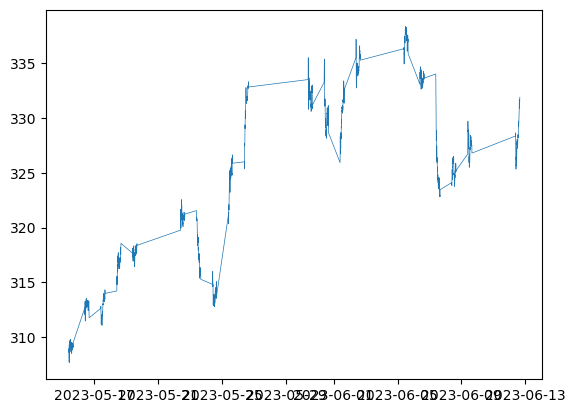

In [3]:
import matplotlib.pyplot as plt

plt.plot(ohlcv_data['MSFT']['Adj Close'], linewidth=0.5)

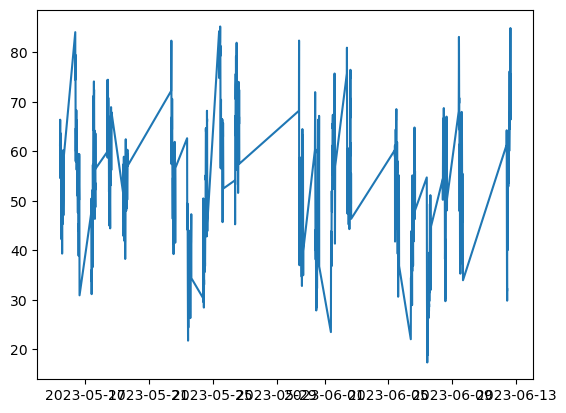

In [4]:
plt.plot(ohlcv_data['MSFT']['RSI'])